In [1]:
print("Lord Balaji")

Lord Balaji


### 1 - Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2- Load Data

In [4]:
df = pd.read_csv("E:\Python_Vedeo\DataSets\Bangluru_House_Price_Data\Bengaluru_House_Data.csv")

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape

(13320, 9)

### 3 - Data Cleaning

In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [13]:
high_null= df.isnull().sum()/df.shape[0]*100
high_null

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [29]:
df2 = df.iloc[:,[0,1,3,5,6,7,8]]

In [30]:
df2.head()

,area_type,availability,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00


In [37]:
df3 = df2.fillna(df2.balcony.mean())

In [39]:
df3.isnull().sum().sum()

0

### 4 - Feature Selection

In [40]:
df3.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [41]:
df3.area_type.replace({'Super built-up  Area':4, 'Plot  Area':3, 'Built-up  Area':2,
       'Carpet  Area':1}, inplace=True)

In [42]:
df3.area_type.unique()

array([4, 3, 2, 1], dtype=int64)

In [48]:
df3.availability = np.where(df3.availability == 'Ready To Move',1,0)

In [49]:
df3.availability.unique()

array([0, 1])

In [51]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', 1.5843757375501535, '9 Bedroom', '27 BHK', '10 Bedroom',
       '11 Bedroom', '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK',
       '8 BHK', '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [54]:
df3['size'].replace({'2 BHK':2, '4 Bedroom':4, '3 BHK':3, '4 BHK':4, '6 Bedroom':6, '3 Bedroom':3,
       '1 BHK':1, '1 RK':1, '1 Bedroom':1, '8 Bedroom':8, '2 Bedroom':2,
       '7 Bedroom':7, '5 BHK':5, '7 BHK':7, '6 BHK':6, '5 Bedroom':5, '11 BHK':11,
       '9 BHK':9,'9 Bedroom':9, '27 BHK':27, '10 Bedroom':10,
       '11 Bedroom':11, '10 BHK':10, '19 BHK':19, '16 BHK':16, '43 Bedroom':43, '14 BHK':14,
       '8 BHK':8, '12 Bedroom':12, '13 BHK':13, '18 Bedroom':18}, inplace=True)

In [58]:
df3['size'].replace({1.58437574:1}, inplace=True)

In [59]:
df3['size'].unique()

array([ 2.        ,  4.        ,  3.        ,  6.        ,  1.        ,
        8.        ,  7.        ,  5.        , 11.        ,  9.        ,
        1.58437574, 27.        , 10.        , 19.        , 16.        ,
       43.        , 14.        , 12.        , 13.        , 18.        ])

In [60]:
df3.head()

,area_type,availability,size,total_sqft,bath,balcony,price
0,4,0,2.0,1056,2.0,1.0,39.07
1,3,1,4.0,2600,5.0,3.0,120.00
2,2,1,3.0,1440,2.0,3.0,62.00
3,4,1,3.0,1521,3.0,1.0,95.00
4,4,1,2.0,1200,2.0,1.0,51.00


### 5- Outlier Detection and Fix

In [65]:
df3.describe()

,area_type,availability,size,bath,balcony,price
count,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000
mean,3.465315,0.794369,2.802279,2.686536,1.584376,112.565627
std,0.806907,0.404177,1.294885,1.340277,0.798360,148.971674
min,1.000000,0.000000,1.000000,1.000000,0.000000,8.000000
25%,3.000000,1.000000,2.000000,2.000000,1.000000,50.000000
50%,4.000000,1.000000,3.000000,2.000000,2.000000,72.000000
75%,4.000000,1.000000,3.000000,3.000000,2.000000,120.000000
max,4.000000,1.000000,43.000000,40.000000,3.000000,3600.000000


In [66]:
q1 = df3.price.quantile(.25)
q3 = df3.price.quantile(.75)
q1,q3

(50.0, 120.0)

In [67]:
iqr = q3-q1
iqr

70.0

In [70]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
upper_limit, lower_limit

(225.0, -55.0)

In [71]:
df3.shape

(13320, 7)

In [77]:
df4 = df3[(df3['price']<upper_limit) & (df3['price']>lower_limit)]

In [78]:
df3.shape, df4.shape

((13320, 7), (12002, 7))

In [79]:
df4.describe()

,area_type,availability,size,bath,balcony,price
count,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000
mean,3.493334,0.786869,2.646491,2.501227,1.562627,78.876116
std,0.810520,0.409537,1.098179,1.103865,0.788895,42.939225
min,1.000000,0.000000,1.000000,1.000000,0.000000,8.000000
25%,3.000000,1.000000,2.000000,2.000000,1.000000,48.000000
50%,4.000000,1.000000,2.000000,2.000000,2.000000,66.207500
75%,4.000000,1.000000,3.000000,3.000000,2.000000,99.000000
max,4.000000,1.000000,18.000000,18.000000,3.000000,224.500000


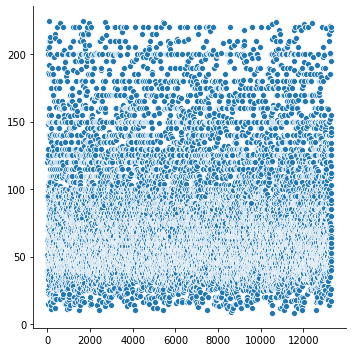

In [85]:
sns.relplot(data = df4['price'])

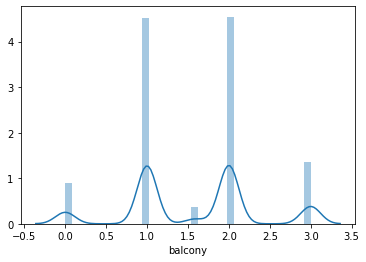

In [87]:
sns.distplot(df4['balcony'])

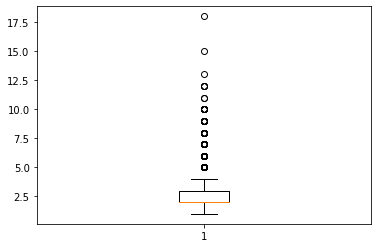

In [91]:
plt.boxplot(df4.bath)
plt.show()

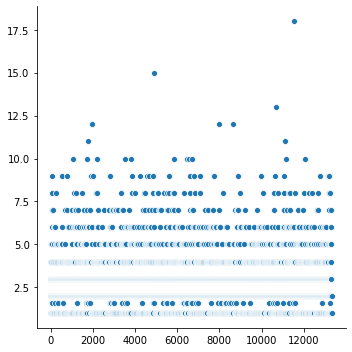

In [92]:
sns.relplot(data = df4.bath)

In [96]:
q1 = df4.bath.quantile(.25)
q3 = df4.bath.quantile(.75)
q1,q2

(2.0, 120.0)

In [98]:
iqr1 = q3-q1
iqr1

1.0

In [99]:
upper_limit1 = q3+1.5*iqr1
lower_limit1 = q1-1.5*iqr1
upper_limit1, lower_limit1

(4.5, 0.5)

In [100]:
df5 = df4[(df4.bath<upper_limit1) & (df4.bath>lower_limit1)]

In [101]:
df5.shape

(11447, 7)

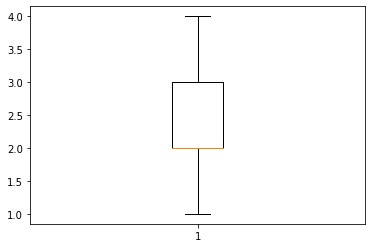

In [103]:
plt.boxplot(df5.bath)
plt.show()

In [104]:
df5.describe()

,area_type,availability,size,bath,balcony,price
count,11447.000000,11447.000000,11447.000000,11447.000000,11447.000000,11447.000000
mean,3.518040,0.781952,2.491498,2.325214,1.555201,75.873932
std,0.808397,0.412938,0.768457,0.700028,0.778625,40.579168
min,1.000000,0.000000,1.000000,1.000000,0.000000,8.000000
25%,3.000000,1.000000,2.000000,2.000000,1.000000,47.000000
50%,4.000000,1.000000,2.000000,2.000000,2.000000,65.000000
75%,4.000000,1.000000,3.000000,3.000000,2.000000,94.850000
max,4.000000,1.000000,8.000000,4.000000,3.000000,224.500000


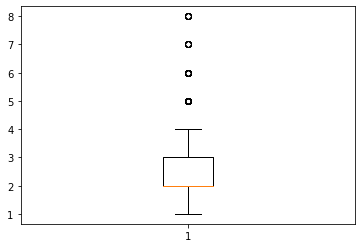

In [107]:
plt.boxplot(df5['size'])
plt.show()

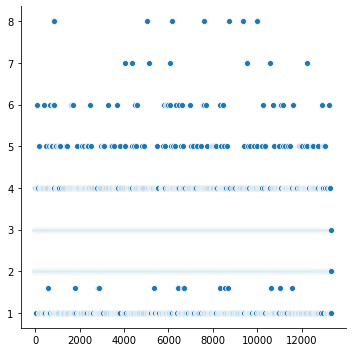

In [128]:
sns.relplot(data = df5['size'])

In [129]:
q5 = df5['size'].quantile(.75)
q4 = df5['size'].quantile(.25)
q5,q4

(3.0, 2.0)

In [130]:
iqr3 = q5-q4
iqr3

1.0

In [131]:
upper_limit3 = q5+1.5*iqr3
lower_limit3 = q4-1.5*iqr3
lower_limit3, upper_limit3

(0.5, 4.5)

In [134]:
df6 = df5[(df5['size']>lower_limit3) & (df5['size']<upper_limit3)]

In [135]:
df5.shape, df6.shape

((11447, 7), (11311, 7))

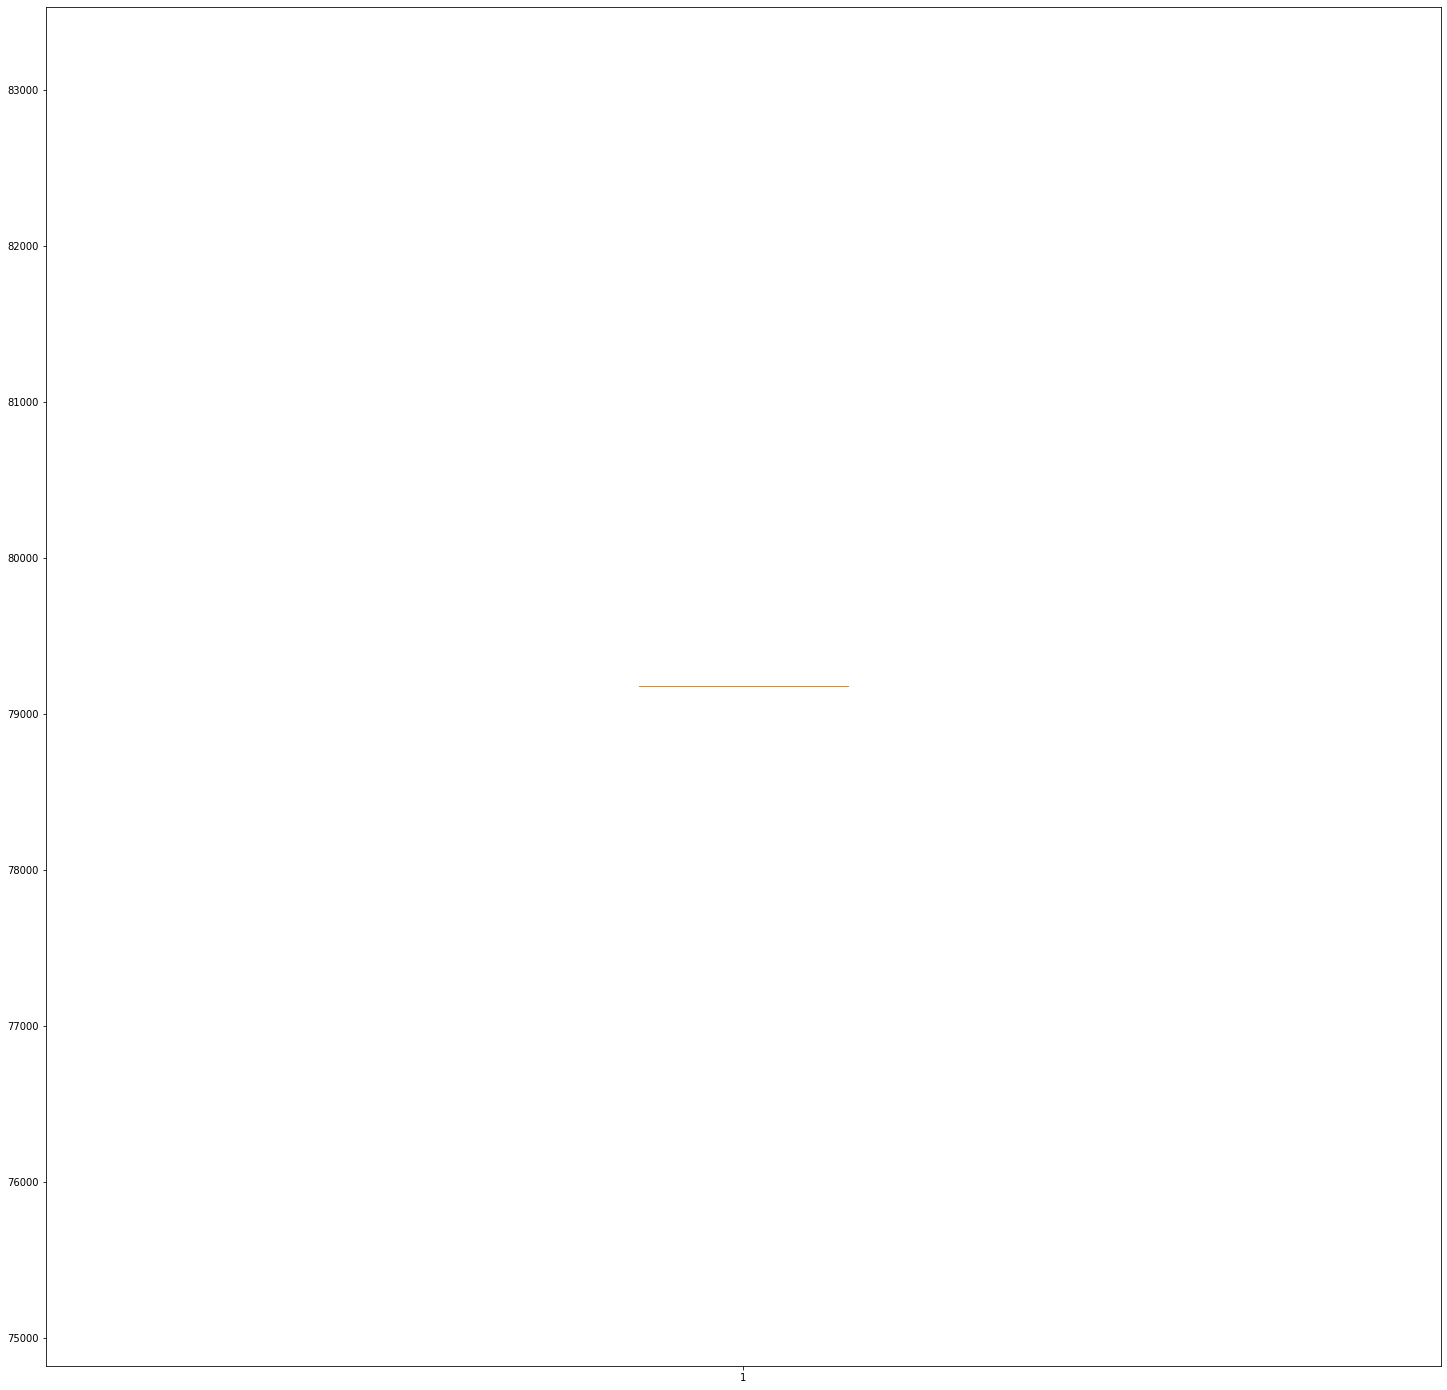

In [149]:
plt.figure(figsize = (25,25))
plt.boxplot(df6.size)
plt.show()

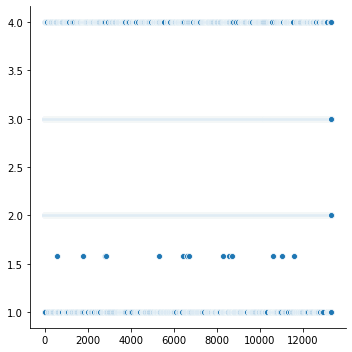

In [139]:
sns.relplot(data = df6['size'])

In [144]:
df6.describe()

,area_type,availability,size,bath,balcony,price
count,11311.000000,11311.000000,11311.000000,11311.000000,11311.000000,11311.000000
mean,3.525595,0.779330,2.455148,2.308613,1.556107,75.277773
std,0.808134,0.414717,0.691698,0.685352,0.776801,40.184121
min,1.000000,0.000000,1.000000,1.000000,0.000000,8.000000
25%,3.000000,1.000000,2.000000,2.000000,1.000000,46.790000
50%,4.000000,1.000000,2.000000,2.000000,2.000000,65.000000
75%,4.000000,1.000000,3.000000,3.000000,2.000000,92.610000
max,4.000000,1.000000,4.000000,4.000000,3.000000,224.500000


In [150]:
df6.keys()

Index(['area_type', 'availability', 'size', 'total_sqft', 'bath', 'balcony',
       'price'],
      dtype='object')

In [153]:
df7 = df6.iloc[:,[0,1,2,4,5,6]]
df7.head()

,area_type,availability,size,bath,balcony,price
0,4,0,2.0,2.0,1.0,39.07
2,2,1,3.0,2.0,3.0,62.00
3,4,1,3.0,3.0,1.0,95.00
4,4,1,2.0,2.0,1.0,51.00
5,4,1,2.0,2.0,1.0,38.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11311 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     11311 non-null  int64  
 1   availability  11311 non-null  int32  
 2   size          11311 non-null  float64
 3   bath          11311 non-null  float64
 4   balcony       11311 non-null  float64
 5   price         11311 non-null  float64
dtypes: float64(4), int32(1), int64(1)
memory usage: 574.4 KB


### 5-Split data into x(independent) and y(dependent) variables

In [159]:
x = df7.iloc[:,[0,1,2,3,4]]
y = df7.iloc[:,[5]]

In [160]:
x.head()

,area_type,availability,size,bath,balcony
0,4,0,2.0,2.0,1.0
2,2,1,3.0,2.0,3.0
3,4,1,3.0,3.0,1.0
4,4,1,2.0,2.0,1.0
5,4,1,2.0,2.0,1.0


In [161]:
y.head()

,price
0,39.07
2,62.00
3,95.00
4,51.00
5,38.00


In [162]:
x.shape, y.shape

((11311, 5), (11311, 1))

### 6 - catagorize the data

In [163]:
x.keys()

Index(['area_type', 'availability', 'size', 'bath', 'balcony'], dtype='object')

In [177]:
x['area_type'] = x.area_type.astype('category')
x['availability'] = x.availability.astype('category')
x['bath'] = x.bath.astype('category')
x['balcony'] = x.balcony.astype('category')
x['size'] = x['size'].astype('category')

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

### Train and Test the data

In [179]:
from sklearn.model_selection import train_test_split

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [190]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7917, 5)
(7917, 1)
(3394, 5)
(3394, 1)


### 7- Feature scaling of x the data with standard scalar

In [191]:
from sklearn.preprocessing import StandardScaler

In [192]:
sc = StandardScaler()

In [193]:
sc.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [194]:
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

### 8- Buld Linear Model

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
lr = LinearRegression()

In [198]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Check Score

In [199]:
lr.score(x_test, y_test)

0.3946644723744984

### Prediction

In [202]:
lm_pred = lr.predict(x_test)
lm_pred

array([[ 59.92023857],
       [ 62.25015838],
       [ 62.25015838],
       ...,
       [102.66358482],
       [ 60.01101464],
       [ 74.60261394]])

In [208]:
predicted_value = pd.DataFrame(lm_pred, columns = ['Predicted'])

### 10- Evaluate Model by MSE, RMSE and R-Squared Values

In [209]:
from sklearn.metrics import mean_squared_error

In [211]:
mse = mean_squared_error(y_test, predicted_value)
mse

984.4834402589255

In [213]:
RMSE = np.sqrt(mse)
RMSE

31.37647909276829

In [214]:
from sklearn.metrics import r2_score

In [216]:
r_squared = r2_score(y_test,predicted_value )
r_squared

0.3946644723744984

### 11- Redge and Lasso

In [217]:
from sklearn.linear_model import Ridge, Lasso

In [220]:
rd = Ridge()
rd.fit(x_train,y_train)
rd.score(x_test, y_test)

0.3946670038733915

In [223]:
ls = Lasso()
ls.fit(x_train, y_train)
ls.score(x_test, y_test)

0.3932222973434451

In [224]:
rd2 = Ridge(alpha = 2)
rd2.fit(x_train,y_train)
rd2.score(x_test, y_test)

0.39466952334810285

In [225]:
ls2 = Lasso(alpha = 2)
ls2.fit(x_train, y_train)
ls2.score(x_test, y_test)

0.3904229106308625

In [230]:
rd3 = Ridge(alpha = 5)
rd3.fit(x_train,y_train)
rd3.score(x_test, y_test)

0.39467700986391047

In [231]:
ls3 = Lasso(alpha = 5)
ls3.fit(x_train, y_train)
ls3.score(x_test, y_test)

0.37433968185246336